In [1]:
!pip install networkx

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from random import uniform

In [3]:
import networkx as nx

In [4]:
def load_dataset():
    !mkdir -p dataset
    !wget -nc https://raw.githubusercontent.com/Y4rd13/sharp-graphs/main/Grupo1-393371.csv -P dataset
    df = pd.read_csv('/content/dataset/Grupo1-393371.csv', encoding='utf-8', usecols=['node(number)', 'seconds(number)'])
    
    return df

In [5]:
df = load_dataset()
node = df['node(number)']
seconds = df['seconds(number)']

File ‘dataset/Grupo1-393371.csv’ already there; not retrieving.



In [6]:
df.head(7)

,node(number),seconds(number)
0,4,0.846
1,0,0.884
2,3,1.197
3,0,1.261
4,1,0.515
5,4,1.567
6,3,1.577


In [7]:
dict(Counter(node))

{0: 2839, 1: 1367, 2: 871, 3: 816, 4: 1076}

In [8]:
arr = np.zeros(shape=(5, 5), dtype=int)

In [9]:
def graph(run_name, arr):
    G = nx.Graph()

    G.add_node(0, pos=(4, 2))
    G.add_node(1, pos=(3, 4))
    G.add_node(2, pos=(2, 0))
    G.add_node(3, pos=(1, 4))
    G.add_node(4, pos=(0, 2))

    for i in range(5):
        for j in range(5):
            G.add_edge(i, j, weight=arr[i][j])

    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G, pos)

    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, 
                                 pos,
                                 edge_labels=labels)
    
    plt.savefig(run_name)    

In [10]:
!mkdir sessions

mkdir: cannot create directory ‘sessions’: File exists


In [11]:
session_num = 0
start = 60
arr = np.zeros(shape=(5, 5), dtype=int)

--- Starting trial: ./sessions/run-0.png
60.301
--- Starting trial: ./sessions/run-1.png
120.035


KeyboardInterrupt: ignored

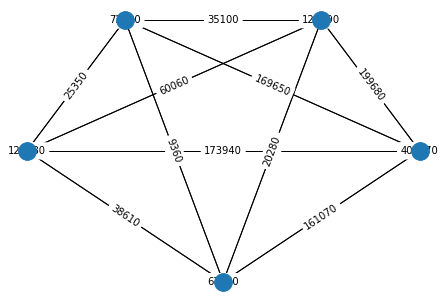

In [12]:
for i in seconds:
    for j in range(len(node)):
        if j != 0:
            arr[node[j-1]][node[j]] += 1

    if i >= start:
        run_name = './sessions/run-%d.png' % session_num
        print('--- Starting trial: %s' % run_name)
        print('%s' % i)

        graph(run_name, arr)

        session_num += 1
        start += 60

In [ ]:
!rm -rf sessions